In [19]:
import csv
import networkx as net
import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
def CargarBD(fileName):
    _Diccionario = {}
    
    #Lee el archivo csv identificando cada valor separado por la coma; lo numeros tienen un . decimal
    #Para evitar la confusión
    with open(fileName, encoding='utf-8-sig') as db:
        file = csv.reader(db, delimiter=',')
        
        #Al no tener cabecera el archivo csv, empezará por la primera fila
        i = 0
        for v in file:
                dato = {}
                dato["dept"] = v[1]            #Valor en la columna uno del csv "Nombre departamento"
                dato["x_cord"] = float(v[15])  #Valor de la coordenada x del csv
                dato["y_cord"] = float(v[16])  #Valor de la coordenada y del csv
                _Diccionario[i] = dato
                del dato
                i+=1

    return _Diccionario

def CalcPeso(x1,y1,x2,y2):
    peso = (x1-x2)**2 + (y1-y2)**2      #Se calcula peso basado en: x^2 + y^2 = z^2
    peso = peso**(1/2)
    return peso


def DiccionarioPesos(fileName):
    Dict = CargarBD(fileName)
    
    peso = {}                           #Diccionario de pesos
    
    for i in Dict:
        aux = []                        #Donde se van a guardar los pesos para un nodo
        for j in Dict:
            aux.append(CalcPeso(float(Dict[i]["x_cord"]),float(Dict[i]["y_cord"]), float(Dict[j]["x_cord"]),float(Dict[j]["y_cord"]))) #calcula peso de un nodo a otro con sus coordenadas 'x' y 'y'
        peso[i] = aux                   #Guarda el arreglo de pesos (aux) de un nodo especifico en su indice 'i' de peso[i]
        del aux                         #Se elimina el aux para que se vuelva a cargar con los pesos de otro nodo
    
    return peso, Dict

In [ ]:
peso, Dict = DiccionarioPesos("DataSetTest.csv")

#Se muestra el diccionario de pesos. Para un id = 1, estan los pesos a cada uno de los otros centros poblados.
print(peso)

Nodos:  14 
 ['APURIMAC', 'JUNIN', 'ICA', 'CUSCO', 'TUMBES', 'LIMA', 'SAN MARTIN', 'PIURA', 'LAMBAYEQUE', 'ANCASH', 'AYACUCHO', 'AMAZONAS', 'CAJAMARCA', 'PUNO'] 


Relaciones:  105 
 [('APURIMAC', 'APURIMAC'), ('APURIMAC', 'JUNIN'), ('APURIMAC', 'ICA'), ('APURIMAC', 'CUSCO'), ('APURIMAC', 'TUMBES'), ('APURIMAC', 'LIMA'), ('APURIMAC', 'SAN MARTIN'), ('APURIMAC', 'PIURA'), ('APURIMAC', 'LAMBAYEQUE'), ('APURIMAC', 'ANCASH'), ('APURIMAC', 'AYACUCHO'), ('APURIMAC', 'AMAZONAS'), ('APURIMAC', 'CAJAMARCA'), ('APURIMAC', 'PUNO'), ('JUNIN', 'JUNIN'), ('JUNIN', 'ICA'), ('JUNIN', 'CUSCO'), ('JUNIN', 'TUMBES'), ('JUNIN', 'LIMA'), ('JUNIN', 'SAN MARTIN'), ('JUNIN', 'PIURA'), ('JUNIN', 'LAMBAYEQUE'), ('JUNIN', 'ANCASH'), ('JUNIN', 'AYACUCHO'), ('JUNIN', 'AMAZONAS'), ('JUNIN', 'CAJAMARCA'), ('JUNIN', 'PUNO'), ('ICA', 'ICA'), ('ICA', 'CUSCO'), ('ICA', 'TUMBES'), ('ICA', 'LIMA'), ('ICA', 'SAN MARTIN'), ('ICA', 'PIURA'), ('ICA', 'LAMBAYEQUE'), ('ICA', 'ANCASH'), ('ICA', 'AYACUCHO'), ('ICA', 'AMAZONAS'), 

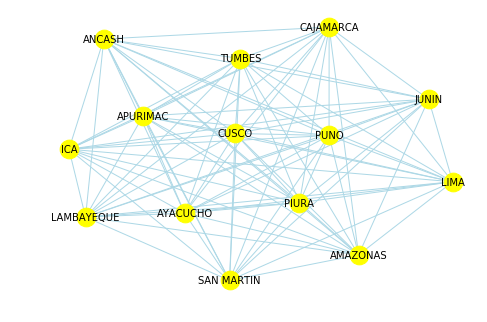

In [102]:
#Ver Grafo de Manera Gráfica

Grafo = net.Graph()

#Usando los metodos de CargarBD y CalcPeso, se hace una pequeña modificación en el DiccionarioPesos, ahora llamado DiccionarioPesos_Grafo

def DiccionarioPesos_Grafo(fileName):
    Dict = CargarBD(fileName)
    
    peso = {}                           #Diccionario de pesos
    
    for i in Dict:
        aux = []
        for j in Dict:
            aux.append(CalcPeso(float(Dict[i]["x_cord"]),float(Dict[i]["y_cord"]), float(Dict[j]["x_cord"]),float(Dict[j]["y_cord"])))    
            Grafo.add_weighted_edges_from([(Dict[j]['dept'], Dict[i]['dept'], aux[j])])
        peso[i] = aux
        del aux                   #Se elimina el aux para que se vuelva a cargar con los pesos de otro nodo
    
DiccionarioPesos_Grafo("DataSetTest.csv")
    
#net.draw(Grafo, with_labels = True, node_size=300, node_color='y')
#plt.draw()
#plt.show()

print("Nodos: ", Grafo.number_of_nodes(),"\n", Grafo.nodes(),"\n\n")
print("Relaciones: ", Grafo.number_of_edges(),"\n",Grafo.edges())

net.draw(Grafo, with_labels = True, node_size=350, node_color='yellow',font_size=10, edge_color='lightblue')
plt.savefig("Grafo_Dept.jpg")